In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

ModuleNotFoundError: No module named 'gensim'

In [3]:
#####################################################         Reading CSV        #################################################

from google.colab import drive
drive.mount('/content/drive')


PATH = os.getcwd()
DATADIR = PATH + '/drive/My Drive/B.Tech Major Project/Dataset/Dataset_Final_Major.csv'
df = pd.read_csv(DATADIR,delimiter=',',encoding='latin-1')

df.info()
sns.countplot(df.type)
plt.xlabel('Label')
plt.title('Number of Real and Fake News Instances')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
df.head()
df['type'].value_counts()
#df['main_img_url'].value_counts()
df.head()

,Unnamed: 0,type,text,title,main_img_url
0,0,real,"They stood in line at Trump Tower, sometimes u...","At Donald Trump<U+2019>s Properties, a Showcas...",https://static01.nyt.com/images/2016/11/23/us/...
1,1,real,Donald J. Trump <U+2019>s foundation informed ...,Trump Foundation Tells New York It Has Stopped...,https://static01.nyt.com/images/2016/10/18/us/...
2,2,real,President-elect Donald J. Trump won the White ...,"Donald Trump Prepares for White House Move, bu...",https://static01.nyt.com/images/2016/11/12/us/...
3,3,real,An investment pitch for a new Texas hotel is t...,Luring Chinese Investors With Trump<U+2019>s N...,https://static01.nyt.com/images/2016/10/21/bus...
4,4,real,President-elect Donald J. Trump <U+2019>s wife...,Melania and Barron Trump Won<U+2019>t Immediat...,https://static01.nyt.com/images/2016/11/21/us/...


In [0]:
'''from google.colab.patches import cv2_imshow
from skimage import io

data=df[["type","text","title","main_img_url"]]
#data.columns
tr=0
fs=0
x=0
for i, j in data.iterrows(): 
  if(j['type']=='real'):
    x=x+1
    if(x%500 ==0):
      print(x)
    continue
  else:
    link=j['main_img_url']
    #print(link)
    if(x%500==0):
      print(x)
    try:
      img=io.imread(link);
      tr=tr+1
      #cv2_imshow(img)
    except Exception as e:  # in the interest in keeping the output clean... 
      data.drop(data[ data['main_img_url'] == link ].index, inplace = True)
      fs=fs+1
      #print(i,j) 
    x=x+1
print(tr, fs)
'''

In [4]:
#print(tr,fs)
data = df[["type","text","title","main_img_url"]]
print(data['type'].value_counts())
data.columns

real    2725
fake    2447
Name: type, dtype: int64


Index(['type', 'text', 'title', 'main_img_url'], dtype='object')

In [0]:
#data.to_csv(PATH + '/drive/My Drive/B.Tech Minor Project/Dataset/Dataset_Final.csv')
#print(1)
#PATH = os.getcwd()
#DATADIR = PATH + '/drive/My Drive/B.Tech Minor Project/Dataset/Dataset_Final.csv'
#df1 = pd.read_csv(DATADIR,delimiter=',',encoding='latin-1')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          5172 non-null   object
 1   text          5172 non-null   object
 2   title         5172 non-null   object
 3   main_img_url  5172 non-null   object
dtypes: object(4)
memory usage: 161.8+ KB


real    2725
fake    2447
Name: type, dtype: int64

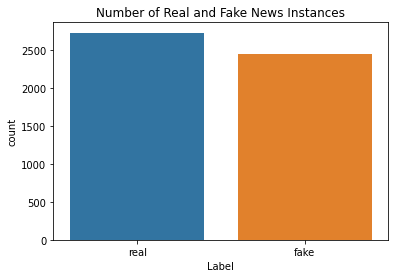

In [6]:
data.info()
sns.countplot(data.type)
plt.xlabel('Label')
plt.title('Number of Real and Fake News Instances')
data.type.value_counts()

https://static01.nyt.com/images/2016/11/23/us/23spectacle1/23spectacle1-master768.jpg
0


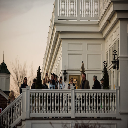

(128, 128, 3)
https://static01.nyt.com/images/2016/10/18/us/18fd-trumpfoundation/18fd-trumpfoundation-master675.jpg


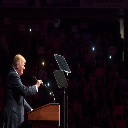

(128, 128, 3)
https://static01.nyt.com/images/2016/11/12/us/12tower1/12tower1-master768.jpg


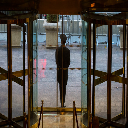

(128, 128, 3)


In [7]:
CATEGORIES = ['real', 'fake']
LENDIR=len(CATEGORIES)

IMG_SIZE = 128
#############################################################      Reading Image URL       ########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils
from matplotlib import pyplot as plt

x=0
for i, j in data.iterrows(): 
  link=j["main_img_url"]
  print(link)
  if(x%500==0):
    print(x)
  try:
    img_array = imutils.url_to_image(link)
    #print('1')
    #img_array=cv2.imread(link);
    #print(img_array)
    #cv2_imshow(img_array)
    #ret,thresh_img1 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
    #cv2_imshow(thresh_img1)
    #ret2,thresh_img2 = cv2.threshold(img_array,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #cv2_imshow(thresh_img2)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    cv2_imshow(new_array)
    x=x+1
    print(new_array.shape)
  except Exception as e:  # in the interest in keeping the output clean... 
    #data.drop(data[ data['main_img_url'] == link ].index, inplace = True)
    print('2')
    pass
    #print(i,j)
  if(x==3): 
    break;   #.....show only one

IMG_SIZE = 128


In [0]:
#################################################################    Lables Encoding    #######################################################
labelencoder = LabelEncoder()
#for i,j in data.iterrows():
  #j['type'] = labelencoder.fit_transform(j['type'])
Y = data.type
Y = labelencoder.fit_transform(Y)

In [9]:
print(len(Y))
print(Y[:5])

5172
[1 1 1 1 1]


In [10]:
##############################################################    Reading and Preprocessing Images       ###########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils

training_data_img = []

IMG_SIZE = 128

def create_training_data():
 
  x=0
  for i, j in data.iterrows(): 
    
    link=j['main_img_url']
    #print(link)
    if(x%500==0):
      print(x)

    try:
      #img_array=io.imread(link);
      img_array = imutils.url_to_image(link)
      #print('1')
      #img_array=cv2.imread(link);
      #print(img_array)
      #cv2_imshow(img_array)
      #ret,thresh_img1 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
      new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
      #cv2_imshow(new_array)
      #print(new_array)
      #print(new_array.shape)
      x=x+1
      training_data_img.append([new_array,Y[i]])
      #print('1')
    except Exception as e:  # in the interest in keeping the output clean... 
      data.drop(data[ data['main_img_url'] == link ].index, inplace = True)
      print('2')
      pass
      #print(i,j) 
 
create_training_data()
 
print(len(training_data_img))

0


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


2
2
500
2
2
1000
2
1500
2000
2500
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3000
2
2
2
2
2
2
2
2
2
2
2
2
3500
2
2
2
4000
2
4500
4995


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 5171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          4995 non-null   object
 1   text          4995 non-null   object
 2   title         4995 non-null   object
 3   main_img_url  4995 non-null   object
dtypes: object(4)
memory usage: 195.1+ KB


real    2564
fake    2431
Name: type, dtype: int64

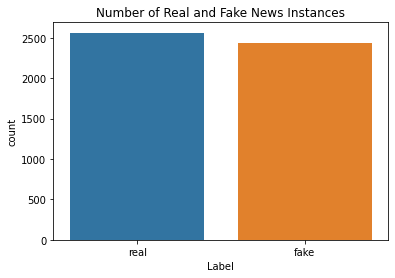

In [11]:
data.info()
sns.countplot(data.type)
plt.xlabel('Label')
plt.title('Number of Real and Fake News Instances')
data.type.value_counts()

In [12]:
print(type(training_data_img))
print(np.array(training_data_img).shape)
print(len(data))
#print(training_data_img[0])
print(len(training_data_img[0][0]))
print(len(training_data_img[0][0][0]))

<class 'list'>
(4995, 2)
4995
128
128


In [0]:
from pickle import dump, load
# save the scaler
dump(training_data_img, open('training_data_img.pkl', 'wb'))


In [25]:
# load the scaler
img_data = load(open('training_data_img.pkl', 'rb'))

print(len(img_data))
print(type(img_data))

print(np.array(img_data).shape)
#print(img_data[0])

print(len(img_data[0][0]))
print(len(img_data[0][0][0]))

4992
<class 'list'>
(4992, 2)
128
128


In [14]:
X_img = []
labels = []
IMG_SIZE = 128

for features,label in training_data_img:
    X_img.append(features)
    labels.append(label)

X_img = np.array(X_img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
#X_img = X_img/255.0
#print(np.array(training_data_img[0]).shape)
#print(np.array(X_img[0]).shape)
#X_img = np.array(training_data_img).reshape(-1, (IMG_SIZE, IMG_SIZE, 3))
#np.array(X_img).reshape(IMG_SIZE,IMG_SIZE,(3))

X_img = X_img/255.0
print(type(X_img))
print((X_img).shape)
print(len(training_data_img))
#print(X_img[0])

###############################################################################################      Image Preprocessing done     #########################################################################

<class 'numpy.ndarray'>
(4995, 128, 128, 3)
4995


In [15]:
train_df = data.text
print(train_df[0])
train_df = train_df.astype(str)
print(train_df[0])
print(len(data.text))

They stood in line at Trump Tower, sometimes up to half an hour, handing over their cash for mementos of the president-elect: mini, gold-wrapped chocolate bricks stamped <U+201C>Trump.<U+201D> Trump monogrammed sweaters, towels and glassware. Trump cologne. <U+201C>I bought it for my two sons,<U+201D> said Shanon Loggins, 47, of Lufkin, Tex., showing off a golden shopping bag embossed with the Trump crest that carried two bottles of Success by Trump, a fragrance for men. <U+201C>They need to be successful,<U+201D> she explained. Business is good for Donald J. Trump . People are flocking to his Midtown Manhattan skyscraper, dining in his restaurants and buying his wares. Reporters are fastidiously chronicling the comings and goings of his transition team , his self-branded properties providing the backdrop for television live shots. Mr. Trump has taken the staid task of preparing to assume the presidency and turned it into an exercise in conspicuous self-promotion and carefully choreogr

In [16]:
#############################################################################################      Reading and preprocessing Text       ##################################################################################
# import warnings
# warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import numpy as np                                  
import pandas as pd                                 
import nltk       
import gensim                                  

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

from gensim.models import Word2Vec                                   #For Word2Vec

X_text = data.text

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_text = X_text.astype(str)

########################################
## process texts in datasets
########################################
print('Processing text dataset')
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
from string import punctuation, ascii_lowercase
import regex as re
from tqdm import tqdm

# replace urls
re_url = re.compile(r"((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\
                    .([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*",
                    re.MULTILINE|re.UNICODE)
# replace ips
re_ip = re.compile("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}")

# setup tokenizer
tokenizer = WordPunctTokenizer()

vocab = Counter()

def text_to_wordlist(text, lower=False):
    # replace URLs
    text = re_url.sub("URL", text)
    
    # replace IPs
    text = re_ip.sub("IPADDRESS", text)
    
    # Tokenize
    text = tokenizer.tokenize(text)
    
    # optional: lower case
    if lower:
        text = [t.lower() for t in text]
    
    # Return a list of words
    vocab.update(text)
    return text

def process_comments(list_sentences, lower=False):
    comments = []
    for text in tqdm(list_sentences):
        txt = text_to_wordlist(text, lower=lower)
        comments.append(txt)
    return comments

                
comments_text = process_comments(X_text, lower=True)

print(comments_text[0])

  2%|▏         | 119/4995 [00:00<00:04, 1187.41it/s]

Processing text dataset


100%|██████████| 4995/4995 [00:03<00:00, 1586.84it/s]

['they', 'stood', 'in', 'line', 'at', 'trump', 'tower', ',', 'sometimes', 'up', 'to', 'half', 'an', 'hour', ',', 'handing', 'over', 'their', 'cash', 'for', 'mementos', 'of', 'the', 'president', '-', 'elect', ':', 'mini', ',', 'gold', '-', 'wrapped', 'chocolate', 'bricks', 'stamped', '<', 'u', '+', '201c', '>', 'trump', '.<', 'u', '+', '201d', '>', 'trump', 'monogrammed', 'sweaters', ',', 'towels', 'and', 'glassware', '.', 'trump', 'cologne', '.', '<', 'u', '+', '201c', '>', 'i', 'bought', 'it', 'for', 'my', 'two', 'sons', ',<', 'u', '+', '201d', '>', 'said', 'shanon', 'loggins', ',', '47', ',', 'of', 'lufkin', ',', 'tex', '.,', 'showing', 'off', 'a', 'golden', 'shopping', 'bag', 'embossed', 'with', 'the', 'trump', 'crest', 'that', 'carried', 'two', 'bottles', 'of', 'success', 'by', 'trump', ',', 'a', 'fragrance', 'for', 'men', '.', '<', 'u', '+', '201c', '>', 'they', 'need', 'to', 'be', 'successful', ',<', 'u', '+', '201d', '>', 'she', 'explained', '.', 'business', 'is', 'good', 'for',

In [17]:
################################################     1.  Remove stopwords         ######################################################
nltk.download("stopwords")
stop = set(stopwords.words('english')) 
print(stop)
print(len(X_text))
print(X_text.shape)
print(X_text.head())
print(type(X_text))

X_text_copy = X_text

import re               
temp =[]
snow = nltk.stem.SnowballStemmer('english')
for sentence in tqdm(X_text_copy):
    sentence = sentence.lower()                 # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
    temp.append(words)
    
X_text_copy = temp    

print(X_text_copy[0])

# sent = []
# for row in X_text:
#     sequ = ''
#     for word in row:
#         sequ = sequ + ' ' + word
#     sent.append(sequ)

# X_text = sent

# print(X_text[0])

  0%|          | 1/4995 [00:00<09:56,  8.37it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'a', 'ain', 're', 'y', "hasn't", 'we', 'yours', 'through', 'can', 'again', 'off', 'during', 'about', 'do', 'couldn', 'shouldn', 'when', 'until', 'their', 'doing', 'hasn', "needn't", 'its', 'did', "aren't", 'ma', 'for', 'up', 'all', "mightn't", 'nor', 'her', "shan't", 'has', 'me', 'there', 'mightn', 'doesn', 'our', 'i', 'them', "doesn't", 'shan', 'herself', 'those', 'as', 'who', 'ourselves', 'an', 'same', "shouldn't", 'here', 'the', 'are', "it's", 'to', 'now', 'that', 've', 'between', 'was', 'he', 'have', "weren't", 'being', 's', 'yourself', 'm', 'most', "wouldn't", 'not', 'what', 'd', 'whom', 'these', 'o', 'out', 'himself', "you'll", 'be', 'each', 'll', 'my', 'more', 'very', 'does', 'wasn', 'at', 'hadn', 'you', 'weren', 'any', 'hers', 'theirs', "haven't", 'it', 'before', 'didn', 'other', 'will', "isn't", 'too', 'and', 'wouldn', 'am', 'been', 'why', 'or', 'then', 'him', 'above

100%|██████████| 4995/4995 [07:20<00:00, 11.34it/s]

['stood', 'line', 'trump', 'tower', 'sometim', 'half', 'hour', 'hand', 'cash', 'memento', 'president-elect:', 'mini', 'gold-wrap', 'chocol', 'brick', 'stamp', 'trump', 'trump', 'monogram', 'sweater', 'towel', 'glasswar', 'trump', 'cologn', 'bought', 'two', 'son', 'said', 'shanon', 'loggin', '47', 'lufkin', 'tex', 'show', 'golden', 'shop', 'bag', 'emboss', 'trump', 'crest', 'carri', 'two', 'bottl', 'success', 'trump', 'fragranc', 'men', 'need', 'success', 'explain', 'busi', 'good', 'donald', 'j', 'trump', 'peopl', 'flock', 'midtown', 'manhattan', 'skyscrap', 'dine', 'restaur', 'buy', 'ware', 'report', 'fastidi', 'chronicl', 'come', 'go', 'transit', 'team', 'self-brand', 'properti', 'provid', 'backdrop', 'televis', 'live', 'shot', 'mr', 'trump', 'taken', 'staid', 'task', 'prepar', 'assum', 'presid', 'turn', 'exercis', 'conspicu', 'self-promot', 'care', 'choreograph', 'brand', 'president-elect', 'make', 'use', 'vast', 'real', 'estat', 'hold', 'also', 'rais', 'question', 'whether', 'exploi

In [18]:
print(len(comments_text))
print(len(X_text_copy))
print(np.array(comments_text).shape)
print(np.array(X_text_copy).shape)
print(len(comments_text[0]))
print(len(X_text_copy[0]))

print("The vocabulary contains {} unique tokens".format(len(vocab)))

4995
4995
(4995,)
(4995,)
1513
628
The vocabulary contains 74416 unique tokens


In [19]:
############################################     2.   Preparing Word vectors from Word2vec      #################################################
comments_backup = comments_text
comments_text = X_text_copy

import gensim
from gensim.models import Word2Vec
model_text = Word2Vec(comments_backup, size=100, window=5, min_count=5, workers=16, sg=0, negative=5)
word_vectors = model_text.wv
print("Number of word vectors: {}".format(len(word_vectors.vocab)))         ##

model_text.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])   #### Example

Number of word vectors: 26086


[('richard', 0.9308004975318909),
 ('william', 0.9300808310508728),
 ('smith', 0.9259020686149597),
 ('sarah', 0.9257254600524902),
 ('tom', 0.922244131565094),
 ('scott', 0.9174560904502869),
 ('jackson', 0.9162620306015015),
 ('jon', 0.9144595861434937),
 ('henry', 0.9139717817306519),
 ('queen', 0.9125683307647705)]

In [20]:
print(comments_backup[0])

['they', 'stood', 'in', 'line', 'at', 'trump', 'tower', ',', 'sometimes', 'up', 'to', 'half', 'an', 'hour', ',', 'handing', 'over', 'their', 'cash', 'for', 'mementos', 'of', 'the', 'president', '-', 'elect', ':', 'mini', ',', 'gold', '-', 'wrapped', 'chocolate', 'bricks', 'stamped', '<', 'u', '+', '201c', '>', 'trump', '.<', 'u', '+', '201d', '>', 'trump', 'monogrammed', 'sweaters', ',', 'towels', 'and', 'glassware', '.', 'trump', 'cologne', '.', '<', 'u', '+', '201c', '>', 'i', 'bought', 'it', 'for', 'my', 'two', 'sons', ',<', 'u', '+', '201d', '>', 'said', 'shanon', 'loggins', ',', '47', ',', 'of', 'lufkin', ',', 'tex', '.,', 'showing', 'off', 'a', 'golden', 'shopping', 'bag', 'embossed', 'with', 'the', 'trump', 'crest', 'that', 'carried', 'two', 'bottles', 'of', 'success', 'by', 'trump', ',', 'a', 'fragrance', 'for', 'men', '.', '<', 'u', '+', '201c', '>', 'they', 'need', 'to', 'be', 'successful', ',<', 'u', '+', '201d', '>', 'she', 'explained', '.', 'business', 'is', 'good', 'for',

In [21]:
############################################      3.   Prepare sequence matrix from vocab         ###############################################
MAX_NB_WORDS = len(word_vectors.vocab)
MAX_SEQUENCE_LENGTH = 200

from keras.preprocessing.sequence import pad_sequences

word_index = {t[0]: i+1 for i,t in enumerate(vocab.most_common(MAX_NB_WORDS))}    ##
sequences_text = [[word_index.get(t, 0) for t in comment]
             for comment in comments_backup[:len(X_text)]]  ##

# pad
training_data_text = pad_sequences(sequences_text, maxlen=MAX_SEQUENCE_LENGTH,    
                     padding="pre", truncating="post")     ##
# list_classes = ["real", "fake"]
# y = train_df[list_classes].values
y = np.array(labels)
print('Shape of data tensor:', training_data_text.shape)
print('Shape of label tensor:', y.shape)

# test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
#                           truncating="post")
# print('Shape of test_data tensor:', test_data.shape)

#print(training_data_text[0])

Shape of data tensor: (4995, 200)
Shape of label tensor: (4995,)


In [0]:
##########################################        4.   Prepare Text embedding vector for embedding layer in Bi-LSTM    #################################
WV_DIM = 100
nb_words_text = min(MAX_NB_WORDS, len(word_vectors.vocab))          ##
# we initialize the matrix with random numbers
wv_matrix_text = (np.random.rand(nb_words_text, WV_DIM) - 0.5) / 5.0     ##
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        # words not found in embedding index will be all-zeros.
        wv_matrix_text[i] = embedding_vector
    except:
        pass      

In [23]:
print(type(training_data_text))
training_data_text = np.array(training_data_text)
print(type(training_data_text))
print((training_data_text).shape)
print(len(training_data_text))
print(training_data_text[0])

######################################################################################       Text Preprocessing ends    #########################################################################################

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(4995, 200)
4995
[   42  2507    12   619    36    23  1592     3  1164    76     8   633
    44  1645     3  7819    90    57  1180    18     0     9     2    71
    17   316    53  9422     3  1456    17  7678  6720 17412 18504     7
     4     5    19     6    23    45     4     5    20     6    23     0
     0     3 23492    10     0     1    23     0     1     7     4     5
    19     6    38  2365    22    18   136   118  4864    50     4     5
    20     6    35     0     0     3  3452     3     9     0     3 11424
   259  1421   211    11  4271  4644  4051     0    25     2    23     0
    14  1633   118  9209     9  1504    34    23     3    11     0    18
   486     1     7     4     5    19     6    42   204     8    30  1706
    50     4     5    20     6    59  1721     1   262    16   232    18
   111   367     1    23     1    69    31 19865     8    39  6610  2144
 11755     3 11756    12    39  5683    10  1829    39     

In [45]:
##########################################################################################      Reading and preprocessing Title      ##############################################################################
import numpy as np                                  
import pandas as pd                                 
import nltk       
import gensim                                  

X_title = data.title

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_title = X_title.astype(str)

comments_title = X_title
###################   1. Tokenisation  #########################
from keras.preprocessing.text import Tokenizer
max_words = 1000
max_len = 300
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(comments_title)
sequences_2 = tok.texts_to_sequences(comments_title) ###### name training_data_title
training_data_title = sequence.pad_sequences(sequences_2,maxlen=max_len)


print(type(training_data_title))
training_data_title = np.array(training_data_title)
print(type(training_data_title))
print((training_data_title).shape)
print(len(training_data_title))
print(training_data_title[0])

###########################################################################################         Title Preprocessing Ends          ################################################################################

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(4995, 300)
4995
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [26]:
print(comments_title[0])

At Donald Trump<U+2019>s Properties, a Showcase for a Brand and a President-Elect


In [32]:
# ################################################       Remove stopwords         ##############################
# nltk.download("stopwords")
# stop = set(stopwords.words('english')) 
# print(stop)
# print(len(X_title))
# print(X_title.shape)
# print(X_title.head())
# print(type(X_title))

# X_title_copy = X_title

# import re               
# temp =[]
# snow = nltk.stem.SnowballStemmer('english')
# for sentence in tqdm(X_title_copy):
#     sentence = sentence.lower()                 # Converting to lowercase
#     cleanr = re.compile('<.*?>')
#     sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
#     sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
#     sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    
#     words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
#     temp.append(words)
    
# X_title_copy = temp    

# print(X_title_copy[0])

# # sent = []
# # for row in X_text:
# #     sequ = ''
# #     for word in row:
# #         sequ = sequ + ' ' + word
# #     sent.append(sequ)

# # X_text = sent

# # print(X_text[0])

  1%|▏         | 73/4992 [00:00<00:06, 729.88it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'because', 'theirs', 'am', 'in', 'more', 'where', 'out', 'after', 'it', 'his', 'which', "you'd", "it's", "should've", 'll', "wasn't", 'yours', 'were', 'your', "doesn't", 'between', 'aren', 'such', 'ours', 'during', 'can', 'by', "isn't", "mustn't", 'itself', 'doesn', 'up', 'did', 'they', 'from', 'hadn', 'now', 'is', "she's", 'on', 'against', 'into', 'for', "haven't", 'shouldn', 'been', 'these', 'again', 'me', 'until', 'this', 'our', 'nor', 're', 'all', "didn't", 'at', "hasn't", 'each', 'myself', 'of', 'had', 'was', 'just', 'to', 'few', 'before', 't', 'ain', "needn't", 'my', 'those', 'yourselves', 'once', 'then', 'no', 'their', "won't", 'any', 'who', 'be', "shouldn't", 'we', 'the', 'than', 'm', "weren't", 'with', 'he', 'isn', 'weren', "you'll", 'hers', 'being', 'that', 'below', 'him', 'not', 'a', 's', 'herself', 'about', 'wasn', 'as', 'couldn', "you're", 'yourself', 'ha

100%|██████████| 4992/4992 [00:06<00:00, 831.58it/s]

['donald', 'trump', 'properti', 'showcas', 'brand', 'president-elect']


In [178]:
# print(len(comments_title))
# print(len(X_title_copy))
# print(np.array(comments_title).shape)
# print(np.array(X_title_copy).shape)
# print(len(comments_title[0]))
# print(len(X_title_copy[0]))

# print("The vocabulary contains {} unique tokens".format(len(vocab)))
# comments_backup2 = comments_title
# comments_title = X_title_copy

4992
4992
(4992,)
(4992,)
6
6
The vocabulary contains 9333 unique tokens


In [179]:
# comments_backup2 = comments_title
# comments_title = X_title_copy

# import gensim
# from gensim.models import Word2Vec
# model_title = Word2Vec(comments_backup2, size=100, window=5, min_count=5, workers=16, sg=0, negative=5)
# word_vectors = model_title.wv
# print("Number of word vectors: {}".format(len(word_vectors.vocab)))         ##


Number of word vectors: 1455


In [0]:
# MAX_NB_WORDS = len(word_vectors.vocab)
# MAX_SEQUENCE_LENGTH = 200

# from keras.preprocessing.sequence import pad_sequences

# word_index = {t[0]: i+1 for i,t in enumerate(vocab.most_common(MAX_NB_WORDS))}    ##
# sequences_title = [[word_index.get(t, 0) for t in comment]
#              for comment in comments_backup2[:len(X_title)]]  ##

# # pad
# training_data_title = pad_sequences(sequences_title, maxlen=MAX_SEQUENCE_LENGTH,    
#                      padding="pre", truncating="post")     ##
# # list_classes = ["real", "fake"]
# # y = train_df[list_classes].values
# y = np.array(labels)
# print('Shape of data tensor:', training_data_title.shape)
# print('Shape of label tensor:', y.shape)

# # test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
# #                           truncating="post")
# # print('Shape of test_data tensor:', test_data.shape)

# print(training_data_title[0])

In [0]:
# WV_DIM = 100
# nb_words_title = min(MAX_NB_WORDS, len(word_vectors.vocab))          ##
# # we initialize the matrix with random numbers
# wv_matrix_title = (np.random.rand(nb_words_title, WV_DIM) - 0.5) / 5.0     ##
# for word, i in word_index.items():
#     if i >= MAX_NB_WORDS:
#         continue
#     try:
#         embedding_vector = word_vectors[word]
#         # words not found in embedding index will be all-zeros.
#         wv_matrix_title[i] = embedding_vector
#     except:
#         pass      

In [46]:
#####################################################################################        Final Train and Test set             ##########################################################################

#fin_X = [X_img, training_data_text, training_data_title, labels]

fin_X = []

total_data = len(training_data_text)
for i in range(len(data)):
  fin_X.append([X_img[i], training_data_text[i], training_data_title[i]])


print(len(fin_X))
print(np.array(fin_X).shape)
print(labels[0:5])
# print(fin_X[0])

4995
(4995, 3)
[1, 1, 1, 1, 1]


In [47]:
print(type(fin_X))
print(np.array(fin_X[0]).shape)
print(len(fin_X))
print(fin_X[0][0])
print("Hello")
print(fin_X[0][1])
print("Hello")
print(fin_X[1][2])
# print("Hello")
# print(fin_X[0][1])
# print("Hello")
# print(fin_X[0][2])

<class 'list'>
(3,)
4995
[[[0.45490196 0.47843137 0.50588235]
  [0.47843137 0.50196078 0.52156863]
  [0.48627451 0.50980392 0.52941176]
  ...
  [0.09803922 0.11764706 0.14117647]
  [0.09411765 0.11372549 0.1372549 ]
  [0.07843137 0.09803922 0.11764706]]

 [[0.47058824 0.49411765 0.52156863]
  [0.48627451 0.50588235 0.5372549 ]
  [0.49411765 0.51764706 0.54901961]
  ...
  [0.09803922 0.11372549 0.1254902 ]
  [0.09411765 0.10980392 0.12156863]
  [0.09019608 0.10196078 0.12156863]]

 [[0.47843137 0.50196078 0.52941176]
  [0.49411765 0.51764706 0.54509804]
  [0.50980392 0.53333333 0.56078431]
  ...
  [0.10196078 0.11764706 0.13333333]
  [0.09803922 0.11372549 0.12941176]
  [0.09019608 0.10980392 0.1254902 ]]

 ...

 [[0.0627451  0.0627451  0.0627451 ]
  [0.09803922 0.10980392 0.11372549]
  [0.14117647 0.15294118 0.15686275]
  ...
  [0.21568627 0.22745098 0.24313725]
  [0.20784314 0.21960784 0.23529412]
  [0.14901961 0.16470588 0.16862745]]

 [[0.03921569 0.03921569 0.03921569]
  [0.0431372

In [0]:
###########################################################################################     Splitting final set to train and test     ###########################################################

from sklearn.model_selection import train_test_split
X_train_val,X_test,Y_train_val,Y_test = train_test_split(fin_X,labels,test_size=0.20)

from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.25)

In [49]:
print("<-------X_train------>")
print(type(X_train))
print(np.array(X_train).shape)
print(np.array(X_train[0]).shape)
print(np.array(X_train[0][0]).shape)
print(np.array(X_train[0][1]).shape)
print(len(X_train))
print(type(X_train))
print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][1]))
print("<-------Y_train------>")
print(type(Y_train))
print(type(Y_train[0]))
print((Y_train[0]))
print("<-------X_test------>")
print(type(X_test[0][0]))
print("<-------Y_test------>")
print(type(Y_test))
print(np.array(Y_train).shape)
print(len(Y_train))

print(type(X_train_val))
print(type(X_train))
print(type(X_val))
print(type(X_test))
print("\n")

print(len(X_train_val))
print(len(X_train))
print(len(X_val))
print(len(X_test))

<-------X_train------>
<class 'list'>
(2997, 3)
(3,)
(128, 128, 3)
(200,)
2997
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<-------Y_train------>
<class 'list'>
<class 'numpy.int64'>
0
<-------X_test------>
<class 'numpy.ndarray'>
<-------Y_test------>
<class 'list'>
(2997,)
2997
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


3996
2997
999
999


In [0]:
#<-------------------------------------------------------------------------------------    IMAGE CLASSIFIER   ------------------------------------------------------------------------------------------------>

In [0]:
################################################################     Extracting image data from final train and test dataset     #######################################
X_train_img = []
X_test_img = []
X_val_img = []

for i in range(len(X_train)):
  temp1 = X_train[i][0].tolist()
  X_train_img.append(temp1)
  
for i in range(len(X_test)):
  temp1 = X_test[i][0].tolist()
  X_test_img.append(temp1)

for i in range(len(X_val)):
  temp1 = X_val[i][0].tolist()
  X_val_img.append(temp1)

In [59]:
print("<-------X train------->")
print(type(X_train_img))
X_train_img = np.array(X_train_img)
print(type(X_train_img))
print(np.array(X_train_img).shape)
print(len(X_train_img))
print("<-------X test------->")
print(type(X_test_img))
X_test_img = np.array(X_test_img)
print(type(X_test_img))
print(np.array(X_test_img).shape)
print(len(X_test_img))
print("<-------X val------->")
print(type(X_val_img))
X_val_img = np.array(X_val_img)
print(type(X_val_img))
print(np.array(X_val_img).shape)
print(len(X_val_img))
print("<-------Y train------->")
print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))
print("<-------Y test------->")
print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))
print("<-------Y val------->")
print(type(Y_val))
Y_val = np.array(Y_val)
print(type(Y_val))
print(np.array(Y_val).shape)
print(len(Y_val))

<-------X train------->
<class 'list'>
<class 'numpy.ndarray'>
(2997, 128, 128, 3)
2997
<-------X test------->
<class 'list'>
<class 'numpy.ndarray'>
(999, 128, 128, 3)
999
<-------X val------->
<class 'list'>
<class 'numpy.ndarray'>
(999, 128, 128, 3)
999
<-------Y train------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2997,)
2997
<-------Y test------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(999,)
999
<-------Y val------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(999,)
999


In [60]:
############################################################################################    VGG16  Model   ###########################################################################
from keras.applications import vgg16
from keras.models import Model
import keras

input_shape = (IMG_SIZE, IMG_SIZE, 3)    

vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)


###############  Without fine tuning
vgg_model.trainable = False                
for layer in vgg_model.layers:
    layer.trainable = False


import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])      

58892288/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f9c1185d518>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x7f9c1185d390>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f9c1185d2b0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f9c11f87f60>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f9c1191c0f0>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f9c1191ceb8>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f9c119bacc0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f9c119ba470>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f9c11963550>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f9c11963588>,block3_conv3,False


In [61]:
#############    VGG without augmentation
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=1)
    return features
    
train_feat_vgg = get_bottleneck_features(vgg_model, X_train_img)
val_feat_vgg = get_bottleneck_features(vgg_model, X_val_img)
test_feat_vgg = get_bottleneck_features(vgg_model, X_test_img)

print('Train Bottleneck Features:', train_feat_vgg.shape, 
      '\nValidation Bottleneck Features:', val_feat_vgg.shape, 
      '\nTest Bottleneck Features:', test_feat_vgg.shape)

999/999 [==============================] - 82s 82ms/step
Train Bottleneck Features: (2997, 8192) 
Validation Bottleneck Features: (999, 8192) 
Test Bottleneck Features: (999, 8192)


In [0]:
# ###############     VGG16 with augmentation
# from keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
#                                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
#                                    horizontal_flip=True, fill_mode='nearest')

# val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow(X_train_img, Y_train, batch_size=30)
# val_generator = val_datagen.flow(X_val_img, Y_val, batch_size=20)
# val_generator = val_datagen.flow(X_test_img, Y_test, batch_size=20)

In [62]:
print(vgg_model.output_shape[1])

8192


In [1]:
######################################################################################     VGG16 model with deep layers for images   ####################################################################
from tensorflow.python.keras import Sequential
from keras.applications import vgg16
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D,  Flatten, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model

# ###### Part 1 - Initialising the CNN ------>
classifier_img = Sequential()

# ##### VGG without aug --------->
input_layer = vgg_model.output_shape[1]
classifier_img.add(InputLayer(input_shape=(input_layer,)))

# # ######  VGG with Aug --------->
# # classifier_img.add(vgg_model)

# ###### Full Connection ->
classifier_img.add(Dense(units = 512, activation = 'relu',input_dim = input_layer))
classifier_img.add(BatchNormalization())
classifier_img.add(Dropout(0.5))
classifier_img.add(Dense(units = 1, activation = 'sigmoid'))

classifier_img.summary()
plot_model(classifier_img, to_file='classifier_img_plot.png', show_shapes=True, show_layer_names=True)

Using TensorFlow backend.


NameError: name 'vgg_model' is not defined

Epoch 1/100
300/300 [==============================] - 5s 15ms/step - loss: 0.7451 - accuracy: 0.6456 - val_loss: 0.5895 - val_accuracy: 0.6677
Epoch 2/100
300/300 [==============================] - 5s 15ms/step - loss: 0.5176 - accuracy: 0.7394 - val_loss: 0.6292 - val_accuracy: 0.6927
Epoch 3/100
300/300 [==============================] - 4s 15ms/step - loss: 0.4528 - accuracy: 0.7908 - val_loss: 0.6644 - val_accuracy: 0.6917
Epoch 4/100
300/300 [==============================] - 4s 15ms/step - loss: 0.4172 - accuracy: 0.8108 - val_loss: 0.6166 - val_accuracy: 0.7057
Epoch 5/100
300/300 [==============================] - 5s 15ms/step - loss: 0.3754 - accuracy: 0.8345 - val_loss: 0.6686 - val_accuracy: 0.7137
Epoch 6/100
300/300 [==============================] - 4s 15ms/step - loss: 0.3442 - accuracy: 0.8505 - val_loss: 0.6724 - val_accuracy: 0.6957
Epoch 7/100
300/300 [==============================] - 4s 15ms/step - loss: 0.3108 - accuracy: 0.8679 - val_loss: 0.7110 - val_accuracy:

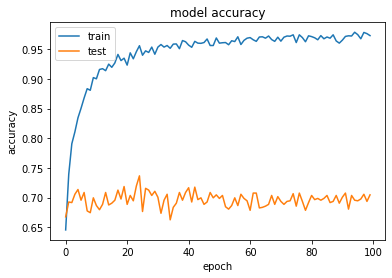

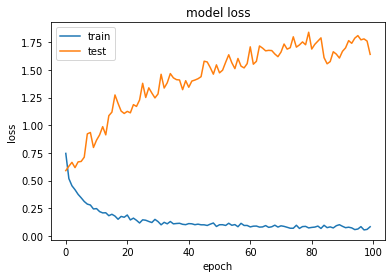

In [64]:
###########################################################################    Training of VGG16 over Images    #########################################################
classifier_img.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history1 = classifier_img.fit(train_feat_vgg,Y_train,batch_size=10,epochs=100,verbose=1,validation_data=(val_feat_vgg,Y_val))  ############# testing epochs =2

##################### list all data in history
print(history1.history.keys())
##################### summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
###################### summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
Y_pred_img = classifier_img.predict_classes(test_feat_vgg)
# Y_pred_prob_img = classifier_text.predict_proba(test_feat_vgg)

cm_img = confusion_matrix(Y_test,Y_pred_img)
print(cm_img)
print("\n")
accuracy_img = accuracy_score(Y_test, Y_pred_img)
print('Accuracy: %f' % accuracy_img)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[317 176]
 [126 380]]


Accuracy: 0.697698


In [68]:
###################        Save Image Model      ####################
classifier_img.save("classifier_img.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# # load and evaluate a saved model
# from keras.models import load_model
 
# # load model
# model_temp_img = load_model('classifier_img.h5')
# # summarize model.
# print(model_temp_img.summary())

In [0]:
#################################################   Blue Cnf matrix  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm1, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]),
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]),
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

Instructions for updating:
Please use `model.predict()` instead.
[[317 176]
 [126 380]]


Accuracy: 0.697698


              precision    recall  f1-score   support

           0       0.72      0.64      0.68       493
           1       0.68      0.75      0.72       506

    accuracy                           0.70       999
   macro avg       0.70      0.70      0.70       999
weighted avg       0.70      0.70      0.70       999

roc_auc_score = 0.6969950853450281


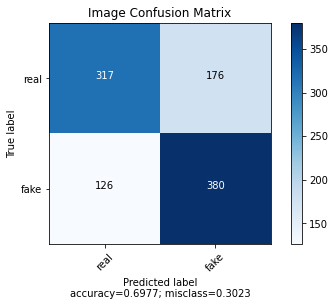

In [71]:
###################################################   Results of VGG16 over Images    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_img = classifier_img.predict_classes(test_feat_vgg)
Y_pred_prob_img = classifier_img.predict_proba(test_feat_vgg)
cm_img = confusion_matrix(Y_test,Y_pred_img)
print(cm_img)
print("\n")
accuracy_img = accuracy_score(Y_test, Y_pred_img)
print('Accuracy: %f' % accuracy_img)
print("\n")

classreport_img = classification_report(Y_test, Y_pred_img)
print(classreport_img)
print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_img, average='macro'))

plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title = "Image Confusion Matrix")
#accuracy = accuracy_score(Y_test, Y_pred_img)
#print('Accuracy: %f' % accuracy)
#print(precision_score(Y_test, Y_pred_img, average='macro'))
#print(recall_score(Y_test, Y_pred_img, average='macro'))

In [72]:
########################################  Prediction Probabilities of Image  #####################################################
#Y_pred_prob_img = classifier_img.predict(X_test_img)
Y_pred_prob_img = Y_pred_prob_img.round()
print(len(Y_pred_prob_img))
print(type(Y_pred_prob_img))
print(np.array(Y_pred_prob_img).shape)
print(Y_pred_prob_img[0:10])

999
<class 'numpy.ndarray'>
(999, 1)
[[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


No Skill: ROC AUC=0.500
VGG16: ROC AUC=0.697


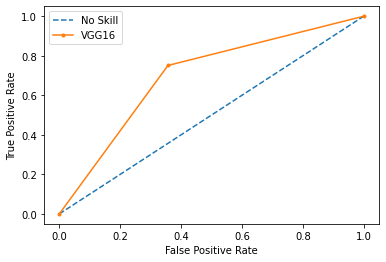

In [73]:
###################################################   ROC for Images    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred_img
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('VGG16: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='VGG16')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
#<----------------------------------------------------------------------------------------------------    TEXT  CLASSIFIER   --------------------------------------------------------------------------------------------------------->

In [0]:
#########################################     Extracting text data from final train and test dataset     #######################################
X_train_text = []
X_val_text = []
X_test_text = []

for i in range(len(X_train)):
  temp1 = X_train[i][1].tolist()
  X_train_text.append(temp1)
  
for i in range(len(X_val)):
  temp1 = X_val[i][1].tolist()
  X_val_text.append(temp1)

for i in range(len(X_test)):
  temp1 = X_test[i][1].tolist()
  X_test_text.append(temp1)

In [75]:
print("<-------X train------->")
print(type(X_train_text))
X_train_text = np.array(X_train_text)
print(type(X_train_text))
print(np.array(X_train_text).shape)
print(len(X_train_text))
print("<-------X test------->")
print(type(X_test_text))
X_test_text = np.array(X_test_text)
print(type(X_test_text))
print(np.array(X_test_text).shape)
print(len(X_test_text))
print("<-------X val------->")
print(type(X_val_text))
X_val_text = np.array(X_val_text)
print(type(X_val_text))
print(np.array(X_val_text).shape)
print(len(X_val_text))
print("\n")
print("<-------Y train------->")
print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))
print("<-------Y test------->")
print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))
print("<-------Y val------->")
print(type(Y_val))
Y_val = np.array(Y_val)
print(type(Y_val))
print(np.array(Y_val).shape)
print(len(Y_val))

<-------X train------->
<class 'list'>
<class 'numpy.ndarray'>
(2997, 200)
2997
<-------X test------->
<class 'list'>
<class 'numpy.ndarray'>
(999, 200)
999
<-------X val------->
<class 'list'>
<class 'numpy.ndarray'>
(999, 200)
999


<-------Y train------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2997,)
2997
<-------Y test------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(999,)
999
<-------Y val------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(999,)
999


In [76]:
# ####################################################################################     Bi-LSTM model architecture for text     ###################################################################

from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout,SpatialDropout1D, Bidirectional
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from keras.layers.normalization import BatchNormalization

wv_layer = Embedding(nb_words_text,
                     WV_DIM,
                     mask_zero=False,
                     weights=[wv_matrix_text],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=False)

# Inputs
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = wv_layer(comment_input)

# bilstm
embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)
x = Bidirectional(LSTM(64, return_sequences=False))(embedded_sequences)

# Output
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
preds = Dense(1, activation='sigmoid')(x)

# build the model
classifier_text = Model(inputs=[comment_input], outputs=preds)

classifier_text.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 200, 100)          2608600   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 100)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129 

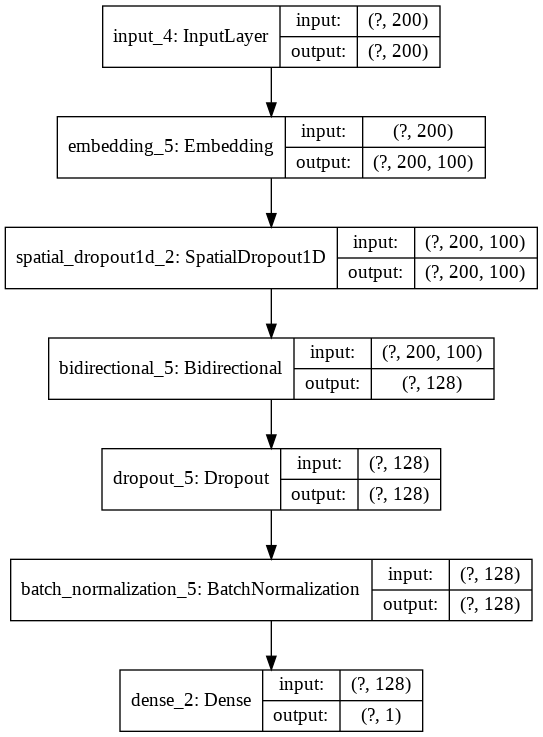

In [77]:
plot_model(classifier_text, to_file='classifier_text_plot.png', show_shapes=True, show_layer_names=True)

Train on 2997 samples, validate on 999 samples
Epoch 1/100
2997/2997 [==============================] - 12s 4ms/step - loss: 0.4382 - accuracy: 0.8048 - val_loss: 0.3479 - val_accuracy: 0.8929
Epoch 2/100
2997/2997 [==============================] - 11s 4ms/step - loss: 0.2457 - accuracy: 0.9029 - val_loss: 0.2407 - val_accuracy: 0.9189
Epoch 3/100
2997/2997 [==============================] - 11s 4ms/step - loss: 0.1679 - accuracy: 0.9303 - val_loss: 0.1994 - val_accuracy: 0.9229
Epoch 4/100
2997/2997 [==============================] - 11s 4ms/step - loss: 0.1377 - accuracy: 0.9476 - val_loss: 0.1423 - val_accuracy: 0.9399
Epoch 5/100
2997/2997 [==============================] - 11s 4ms/step - loss: 0.1062 - accuracy: 0.9636 - val_loss: 0.2134 - val_accuracy: 0.9179
Epoch 6/100
2997/2997 [==============================] - 11s 4ms/step - loss: 0.0981 - accuracy: 0.9673 - val_loss: 0.1278 - val_accuracy: 0.9489
Epoch 7/100
2997/2997 [==============================] - 11s 4ms/step - loss:

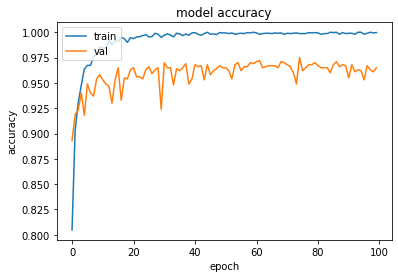

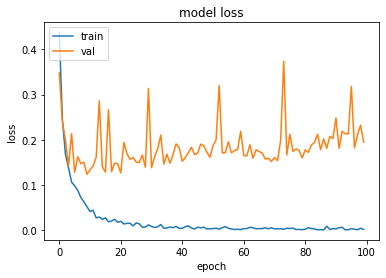

In [78]:
##################################################################################      Training Bi-LSTM model over text      #################################################################
classifier_text.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#history2 = classifier_text.fit(X_train_text,Y_train,batch_size=64,epochs=50,verbose=1,validation_data=(X_test_text,Y_test))     ###########  validation on test set
history2 = classifier_text.fit(X_train_text,Y_train,batch_size=64,epochs=100,verbose=1,validation_data=(X_val_text,Y_val))                   ###########  validation on a subset of training set 

# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [79]:
###################        Save Model      ####################
classifier_text.save("classifier_text.h5")
print("Saved model to disk")

Saved model to disk


[[474  19]
 [ 13 493]]


Accuracy: 0.967968


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       493
           1       0.96      0.97      0.97       506

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999

roc_auc_score = 0.9678843733213607


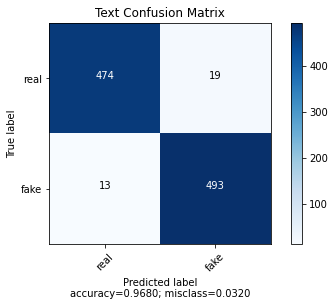

In [80]:
######################################################   Results of Bi-LSTM over text    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_text = classifier_text.predict(X_test_text)
#Y_pred_prob_text = classifier_text.predict_proba(X_test_text)

cm_text=confusion_matrix(Y_test,Y_pred_text.round())
print(cm_text)

print("\n")
accuracy_text = accuracy_score(Y_test, Y_pred_text.round())
print('Accuracy: %f' % accuracy_text)
print("\n")

classreport_text = classification_report(Y_test, Y_pred_text.round())
print(classreport_text)

print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_text.round(), average='macro'))
plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")

In [81]:
##############################################  Prediction Probabilities of Text  #####################################################
Y_pred_prob_text = classifier_text.predict(X_test_text)
print(len(Y_pred_prob_text))
print(type(Y_pred_prob_text))
print(np.array(Y_pred_prob_text).shape)
print(Y_pred_prob_text[0:5])

999
<class 'numpy.ndarray'>
(999, 1)
[[1.0000000e+00]
 [5.0911426e-06]
 [6.3340866e-07]
 [2.0428914e-09]
 [9.9808121e-01]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.968


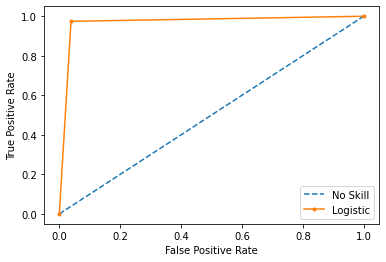

In [82]:
###################################################   ROC for Text    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred_text.round()
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
#<------------------------------------------------------------------------------------------------------    TITLE  CLASSIFIER  -------------------------------------------------------------------------------------------------------->

In [0]:
#######################################################################   Extracting Title from final dataset  ###############################################################
X_train_title = []
X_val_title = []
X_test_title = []

for i in range(len(X_train)):
  temp1 = X_train[i][2].tolist()
  X_train_title.append(temp1)
  
for i in range(len(X_val)):
  temp1 = X_val[i][2].tolist()
  X_val_title.append(temp1)

for i in range(len(X_test)):
  temp1 = X_test[i][2].tolist()
  X_test_title.append(temp1)

In [84]:
print("<-------X train------->")
print(type(X_train_title))
X_train_title = np.array(X_train_title)
print(type(X_train_title))
print(np.array(X_train_title).shape)
print(len(X_train_title))
print("<-------X test------->")
print(type(X_test_title))
X_test_title = np.array(X_test_title)
print(type(X_test_title))
print(np.array(X_test_title).shape)
print(len(X_test_title))
print("<-------X val------->")
print(type(X_val_title))
X_val_title = np.array(X_val_title)
print(type(X_val_title))
print(np.array(X_val_title).shape)
print(len(X_val_title))
print("\n")
print("<-------Y train------->")
print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))
print("<-------Y test------->")
print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))
print("<-------Y val------->")
print(type(Y_val))
Y_val = np.array(Y_val)
print(type(Y_val))
print(np.array(Y_val).shape)
print(len(Y_val))

<-------X train------->
<class 'list'>
<class 'numpy.ndarray'>
(2997, 300)
2997
<-------X test------->
<class 'list'>
<class 'numpy.ndarray'>
(999, 300)
999
<-------X val------->
<class 'list'>
<class 'numpy.ndarray'>
(999, 300)
999


<-------Y train------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2997,)
2997
<-------Y test------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(999,)
999
<-------Y val------->
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(999,)
999


In [90]:
##############################################################     Bi-LSTM model for title     ###############################################

from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model

max_words = 1000
max_len = 300

classifier_title = Sequential()
classifier_title.add(Embedding(max_words,50,input_length=max_len))
classifier_title.add(Bidirectional(LSTM(64)))
classifier_title.add(Dense(256,name='FC1'))
classifier_title.add(BatchNormalization())
classifier_title.add(Activation('relu'))
classifier_title.add(Dropout(0.5))
classifier_title.add(Dense(1,name='out_layer'))
#classifier_title.add(BatchNormalization())
classifier_title.add(Activation('sigmoid'))

classifier_title.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 50)           50000     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               58880     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

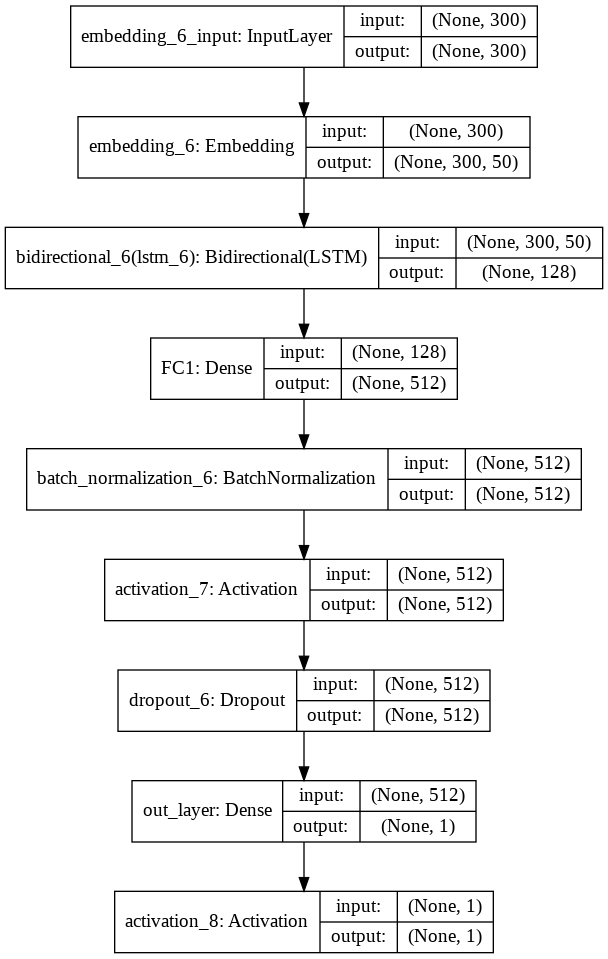

In [86]:
plot_model(classifier_title, to_file='classifier_title_plot.png', show_shapes=True, show_layer_names=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2997 samples, validate on 999 samples
Epoch 1/100
2997/2997 [==============================] - 25s 8ms/step - loss: 0.3618 - accuracy: 0.8358 - val_loss: 0.8174 - val_accuracy: 0.5215
Epoch 2/100
2997/2997 [==============================] - 19s 6ms/step - loss: 0.2201 - accuracy: 0.9052 - val_loss: 0.5920 - val_accuracy: 0.5896
Epoch 3/100
2997/2997 [==============================] - 16s 5ms/step - loss: 0.1786 - accuracy: 0.9233 - val_loss: 0.9312 - val_accuracy: 0.5215
Epoch 4/100
2997/2997 [==============================] - 16s 5ms/step - loss: 0.1645 - accuracy: 0.9286 - val_loss: 0.4930 - val_accuracy: 0.7628
Epoch 5/100
2997/2997 [==============================] - 16s 5ms/step - loss: 0.1340 - accuracy: 0.9463 - val_loss: 0.6009 - val_accuracy: 0.6406
Epoch 6/100
2997/2997 [==============================] - 16s 5ms/step - loss: 0.1060 - accuracy: 0.9540 - val_loss: 0.6833 - val_accuracy: 0.5746
Epoch 7/100
2997/2997 [==============================] - 16s 5ms/step - loss:

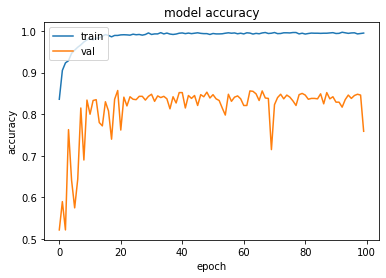

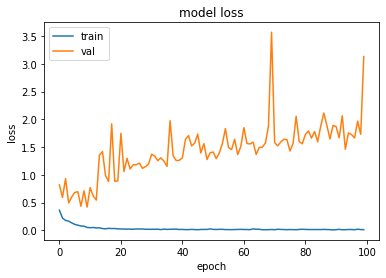

In [91]:
#################################################################################      Training Bi-LSTM model over title     ########################################################################
classifier_title.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#history3 = classifier_title.fit(X_train_title,Y_train,batch_size=64,epochs=50,verbose=1,validation_data=(X_test_title,Y_test))     ###########  validation on test set
history3 = classifier_title.fit(X_train_title,Y_train,batch_size=64,epochs=100,verbose=1,validation_data=(X_val_title,Y_val))        ###########  validation on a subset of training set 

# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [92]:
###################        Save Model      ####################
classifier_title.save("classifier_title.h5")
print("Saved model to disk")

Saved model to disk


[[289 204]
 [ 25 481]]


Accuracy: 0.770771


              precision    recall  f1-score   support

           0       0.92      0.59      0.72       493
           1       0.70      0.95      0.81       506

    accuracy                           0.77       999
   macro avg       0.81      0.77      0.76       999
weighted avg       0.81      0.77      0.76       999

roc_auc_score = 0.7683998909636092


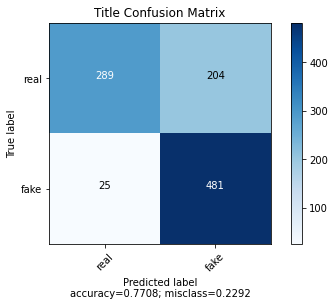

In [93]:
######################################################   Results of Bi-LSTM over title    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_title = classifier_title.predict_classes(X_test_title)
Y_pred_prob_title = classifier_title.predict_proba(X_test_title)

cm_title=confusion_matrix(Y_test,Y_pred_title)
print(cm_title)

print("\n")
accuracy_title = accuracy_score(Y_test, Y_pred_title)
print('Accuracy: %f' % accuracy_title)
print("\n")

classreport_title = classification_report(Y_test, Y_pred_title)
print(classreport_title)

print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_title, average='macro'))

plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title = "Title Confusion Matrix")

In [94]:
##################################################  Prediction Probabilities of Title  #####################################################
print(len(Y_pred_prob_title))
print(type(Y_pred_prob_title))
print(np.array(Y_pred_prob_title).shape)
print(Y_pred_prob_title[0:5])

999
<class 'numpy.ndarray'>
(999, 1)
[[1.0000000e+00]
 [1.0000000e+00]
 [9.9867845e-01]
 [6.9691504e-07]
 [2.3306851e-20]]


No Skill: ROC AUC=0.500
Bi_LSTM for title: ROC AUC=0.768


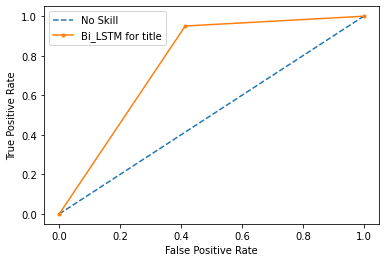

In [95]:
###################################################   ROC for Title    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred_title
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Bi_LSTM for title: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Bi_LSTM for title')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
# #############################################################################     Late Fusion model for combining prediction probabilities from 3 models    ###########################################################################

def late_fusion(w1,w2,w3):
  fin_Y_pred_prob = []
  # w1 = 0.2
  # w2 = 0.5
  # w3 = 0.3
  for i in range(len(Y_test)):
    temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2 + Y_pred_prob_title[i]*w3)/(w1+w2+w3)
    if(temp>=0.5):
      temp = 1
    else:
      temp = 0
    fin_Y_pred_prob.append(temp)

  # print(type(fin_Y_pred_prob))
  # print(len(fin_Y_pred_prob))
  # print(np.array(fin_Y_pred_prob))

  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

  cm_final1=confusion_matrix(Y_test,fin_Y_pred_prob)
  print(cm_final1)
  print(classification_report(Y_test,fin_Y_pred_prob))

  accuracy_final1 = accuracy_score(Y_test, fin_Y_pred_prob)
  print('Accuracy: %f' % accuracy_final1)
  print("roc_auc_score =",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
  print("f1_score =",f1_score(Y_test, fin_Y_pred_prob, average='macro'))

  # plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title  = "Image Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_text, normalize = False,target_names = ['real','fake'],title  = "Text Confusion Matrix")
  # plot_confusion_matrix(cm1 =cm_title, normalize = False,target_names = ['real','fake'],title  = "Title Confusion Matrix")
  print("Image_weight = ",w1)
  print("Text_weight = ",w2)
  print("Title_weight = ",w3)
  plot_confusion_matrix(cm1 =cm_final1, normalize = False,target_names = ['real','fake'],title  = "Final Confusion Matrix")
  return fin_Y_pred_prob

########################################################################################   Final ROC   #####################################################################################################
def final_roc(fin_Y_pred_prob):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from matplotlib import pyplot

  # generate a no skill prediction (majority class)
  ns_probs = [0 for _ in range(len(Y_test))]

  # predict probabilities
  lr_probs = fin_Y_pred_prob
  # keep probabilities for the positive outcome only
  #lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(Y_test, ns_probs)
  lr_auc = roc_auc_score(Y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Late Fusion: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Late Fusion')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

[[454  39]
 [  6 500]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       493
           1       0.93      0.99      0.96       506

    accuracy                           0.95       999
   macro avg       0.96      0.95      0.95       999
weighted avg       0.96      0.95      0.95       999

Accuracy: 0.954955
roc_auc_score = 0.9545173937095622
f1_score = 0.9548592457964524
Image_weight =  0.2
Text_weight =  0.5
Title_weight =  0.3


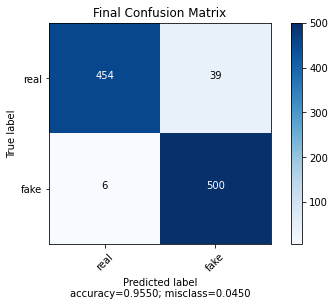

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.955


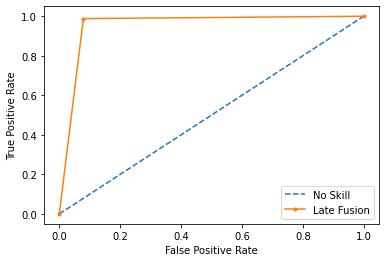

In [99]:
# ##################################################    (a) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.2,0.5,0.3)
final_roc(Final_prediction)

[[418  75]
 [ 10 496]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       493
           1       0.87      0.98      0.92       506

    accuracy                           0.91       999
   macro avg       0.92      0.91      0.91       999
weighted avg       0.92      0.91      0.91       999

Accuracy: 0.914915
roc_auc_score = 0.9140536683529893
f1_score = 0.9143930389337012
Image_weight =  0.33
Text_weight =  0.34
Title_weight =  0.33


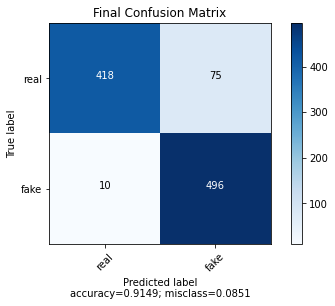

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.914


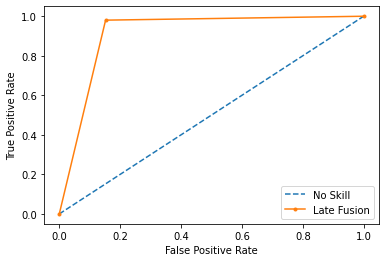

In [101]:
# ##################################################    (b) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.33,0.34,0.33)
final_roc(Final_prediction)

[[421  72]
 [  9 497]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       493
           1       0.87      0.98      0.92       506

    accuracy                           0.92       999
   macro avg       0.93      0.92      0.92       999
weighted avg       0.93      0.92      0.92       999

Accuracy: 0.918919
roc_auc_score = 0.9180844069943638
f1_score = 0.918446924840636
Image_weight =  0.25
Text_weight =  0.45
Title_weight =  0.3


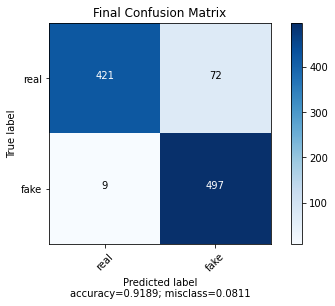

No Skill: ROC AUC=0.500
Late Fusion: ROC AUC=0.918


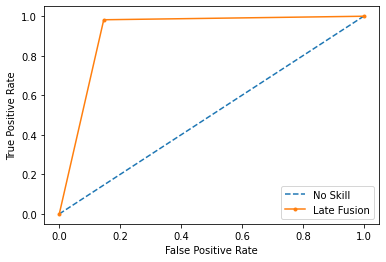

In [102]:
# ##################################################    (b) Late Fusion of all 3 models (Probabilities)  ##############################################
Final_prediction = late_fusion(0.25,0.45,0.3)
final_roc(Final_prediction)